In [197]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats

**Test statisici**

Utilizziamo la tabella integrate_titles che abbiamo prodotto durante il primo laboratorio. Vi ricordo che abbiamo effettuato integrazione di due dataset provenienti da Disney+ e Netflix, contenenti informazioni circa film e serie tv rilasciate sulle due piattaforme di streaming. 
Il dataset integrato è stato pulito e risulta quindi pronto per ulteriori analisi. 

1. Importiamo il dataset:

In [198]:
#codice qui 
integrate_titles = pd.read_csv("integrate_titles_3.csv")

visualizziamo il dataset

In [199]:
#codice qui 
integrate_titles.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,...,director,country,date_added,rating,duration,year,month,day,imdb_score_quant,release_year_quant
0,1,1,1,tm82169,Rocky,MOVIE,1976,PG,119,"['drama', 'sport']",...,John G. Avildsen,United States,2019-08-01,PG,120 min,2019.0,8.0,1.0,EXCELLENT,VERY OLD
1,2,2,2,tm17823,Grease,MOVIE,1978,PG,110,"['comedy', 'romance']",...,Randal Kleiser,United States,2019-11-01,PG,110 min,2019.0,11.0,1.0,VERY GOOD,VERY OLD
2,3,3,3,tm69975,Rocky II,MOVIE,1979,PG,119,"['drama', 'sport']",...,Sylvester Stallone,United States,2019-08-01,PG,119 min,2019.0,8.0,1.0,VERY GOOD,VERY OLD
3,4,4,4,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'comedy']",...,"Terry Gilliam, Terry Jones",United Kingdom,2019-01-02,PG,92 min,2019.0,1.0,2.0,EXCELLENT,VERY OLD
4,5,5,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",...,NaN,United Kingdom,2018-10-02,TV-14,4 Seasons,2018.0,10.0,2.0,EXCELLENT,VERY OLD


In [200]:
#codice qui per vedere numero di elementi e informazioni sulle colonne
integrate_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.2          4170 non-null   int64  
 1   Unnamed: 0.1          4170 non-null   int64  
 2   Unnamed: 0            4170 non-null   int64  
 3   id                    4170 non-null   object 
 4   title                 4170 non-null   object 
 5   type                  4170 non-null   object 
 6   release_year          4170 non-null   int64  
 7   age_certification     2593 non-null   object 
 8   runtime               4170 non-null   int64  
 9   genres                4170 non-null   object 
 10  production_countries  4170 non-null   object 
 11  seasons               1588 non-null   float64
 12  imdb_id               4170 non-null   object 
 13  imdb_score            4170 non-null   float64
 14  imdb_votes            4165 non-null   float64
 15  tmdb_popularity      

**Parte 1. Usiamo la visualizzazione per farci delle idee**

Visualizziamo i valori di imdb_score, separati per type, utilizzando dei box plot. 

prima di tutto verifichiamo che non ci siano valori nulli, come fatto la scorsa volta, eliminando eventualmente le righe con imbd_score è nullo.

In [201]:
#codice qui 
integrate_titles = integrate_titles.dropna(axis=0, subset=['imdb_score'])

stessa cosa per tmdb

In [202]:
#codice qui 
integrate_titles = integrate_titles.dropna(axis=0, subset=['tmdb_score'])

visualizziamo quindi, quanto richiesto (ricordiamo che la funzione da utilizzare è boxplot di pandas con column e by per il raggruppamento). 

<Axes: title={'center': 'imdb_score'}, xlabel='type'>

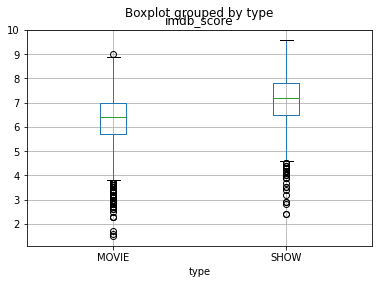

In [203]:
#codice qui 
integrate_titles.boxplot(column='imdb_score', by='type')

# Nota: in generale, se i boxplot si sovrappongono, è molto probabile che il t-test non dia una sostanziale differenza
# Nota2: osservo che in media gli SHOW hanno punteggio più alto dei MOVIE

sembrerebbe che i due box plots si sovrappongano, ma che, in generale, la mediana della valutazione per le serie sia maggiore rispetto ai movie. 
Ripetiamo ora la stessa cosa per tmdb_score

<Axes: title={'center': 'tmdb_score'}, xlabel='type'>

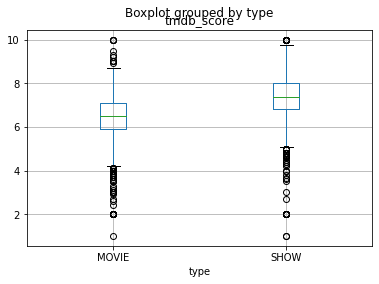

In [204]:
#codice qui 
integrate_titles.boxplot(column='tmdb_score', by='type')

troviamo un andamento simile per il tmdb_score. 
A questo punto ci chiediamo, questa differenza è statisticamente significativa? come possiamo fare per dimostrarlo?

Possiamo utilizzare un test statistico. Proviamo con un t-test. 

Sappiamo che si devono verificare alcune ipotesi:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Prima di tutto, stampiamo il numero di elementi per le due classi (SHOW e MOVIE)

In [205]:
#codice qui 
print('Num elementi SHOW: ', np.sum(integrate_titles['type'] == 'SHOW'))
print('Num elementi MOVIE: ', np.sum(integrate_titles['type'] == 'MOVIE'))

Num elementi SHOW:  1543
Num elementi MOVIE:  2525


le ipotesi sono verificate, quindi possiamo applicare un t-test (confronto fra medie).

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 

ipotesi nulla 

H0 = le media di imdb_score di SHOW e MOVIE non sono statisticamente diverse;

ipotesi alternativa

HA = le medie sono diverse.


significatività = 0.05

In [206]:
#codice qui 
# ttest_ind() tratta campioni indipendenti, ttest_1samp() considera i campioni dipendenti (un campione contenuto nella popolazione)
t, p_value = stats.ttest_1samp(a = integrate_titles[integrate_titles['type'] == 'MOVIE']['imdb_score'], popmean = integrate_titles[integrate_titles['type'] == 'SHOW']['imdb_score'].mean())
print('1SAMP')
print('Valore test: ', t)
print('P-value: ', p_value)
t, p_value = stats.ttest_ind(a = integrate_titles[integrate_titles['type'] == 'MOVIE']['imdb_score'], b = integrate_titles[integrate_titles['type'] == 'SHOW']['imdb_score'])
print('IND')
print('Valore test: ', t)
print('P-value: ', p_value)

# Osservo che la diversità in MOVIE e SHOW vista sul grafico è effettiva, rigetto l'ipotesi nulla dell'uguaglianza statistica

1SAMP
Valore test:  -37.338520624012375
P-value:  2.461928880470485e-243
IND
Valore test:  -23.219093522531608
P-value:  4.261010732299258e-112


che cosa deduciamo da questo?

siccome il p-value << significatività; deduciamo che possiamo rigettare l'ipotesi nulla in favore di quella alternativa.

verifichiamo ora che la media dello score dei film sia più bassa rispetto a quella degli show. Dobbiamo usare il t-test ad una coda. Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 

ipotesi nulla 

H0 = la media di imdb_score dei film è inferiore rispetto a quella degli show. 

ipotesi alternativa

HA = la media di imdb_score è maggiore o uguale rispetto a quella degli show. 


significatività = 0.05

In [207]:
#codice qui
t, p_value = stats.ttest_1samp(a = integrate_titles[integrate_titles['type'] == 'MOVIE']['imdb_score'], popmean = integrate_titles[integrate_titles['type'] == 'SHOW']['imdb_score'].mean(), alternative = 'greater')
print('Valore test: ', t)
print('P-value: ', p_value)

# Nota: il p-value è maggiore di 0.05 scelto (significatività), non posso rifiutare l'ipotesi nulla: i film hanno punteggio in media inferiore rispetto agli show

Valore test:  -37.338520624012375
P-value:  1.0


e facciamo anche un'ultima prova come sanity check, verificando l'alternativa rimasta.

In [208]:
#codice qui 
t, p_value = stats.ttest_1samp(a = integrate_titles[integrate_titles['type'] == 'MOVIE']['imdb_score'], popmean = integrate_titles[integrate_titles['type'] == 'SHOW']['imdb_score'].mean(), alternative = 'less')
print('Valore test: ', t)
print('P-value: ', p_value)

# e infatti rigettiamo l'ipotesi nulla 'nuova' per cui i film hanno punteggio in media maggiore degli show

Valore test:  -37.338520624012375
P-value:  1.2309644402352424e-243


ripetete quanto appena fatto per lo score di tmdb (applicate l'ipotesi che ritenete più corretta, usando i box plots per avere l'idea precisa).

In [209]:
#codice qui
# dal box plot noto che la media dei punteggi degli show è maggiore della media dei punti dei film  
t, p_value = stats.ttest_1samp(a = integrate_titles[integrate_titles['type'] == 'MOVIE']['tmdb_score'], popmean = integrate_titles[integrate_titles['type'] == 'SHOW']['tmdb_score'].mean(), alternative = 'greater')
print('Valore test: ', t)
print('P-value: ', p_value)

# e noto che non possiamo, come osservato precedentemente, che non possiamo rigettare l'ipotesi

Valore test:  -42.88133359403488
P-value:  1.0


adesso approfondiamo la nostra analisi, prima di tutto visualizzando lo score dei film vecchi (prima del 2010) e recenti (post 2010).
Innanzitutto, creiamo una nuova colonna che ci dica se il film è vecchio o nuovo, secondo questa classificazione. Potremmo mettere 1 se è vecchio e 0 altrimenti. 

In [210]:
#codice qui 
integrate_titles['recenti'] = (integrate_titles['release_year'] >= 2010).astype(int)

stampiamo il risultato (primi 50 elementi)

In [211]:
#codice qui 
print(integrate_titles['recenti'].tolist()[0:50])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


quindi visualizziamo con box plot

<Axes: title={'center': 'imdb_score'}, xlabel='recenti'>

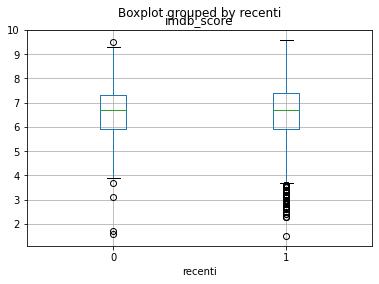

In [212]:
#codice qui 
integrate_titles.boxplot(column='imdb_score', by='recenti')

vi sembra che ci sia una differenza statistica tra le due classi che abbiamo creato?
utilizziamo un t-test. Ripetiamo le verifiche necessarie, e poi eseguiamo il t-test. 

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 

ipotesi nulla 

H0 = le media di imdb_score dei film old e recenti non sono statisticamente diverse

ipotesi alternativa

HA = le medie sono diverse.


significatività = 0.05

In [213]:
#codice qui
t, p_value = stats.ttest_1samp(a = integrate_titles[integrate_titles['recenti'] == 1]['imdb_score'], popmean = integrate_titles[integrate_titles['recenti'] == 0]['imdb_score'].mean())
print('Valore test: ', t)
print('P-value: ', p_value)

# p-value maggiore della significatività, non rigetto l'ipotesi nulla: film old e recenti non sono statisticamente diversi

Valore test:  -1.6717200660027884
P-value:  0.09467106981031759


Deducete voi i risultati di questo t-test, e ditemi se vi torna il risultato. 



A questo punto, utilizziamo le colonne  quantize_imdb_score e quantize_release_year che abbiamo prodotto durante lo scorso laboratorio. 
Recuperiamo la rappresentazione OLAP, e visualizziamo il numero di MOVIE, con uno slicing, concentrandoci su quantize_imdb_score.


In [214]:
quantize_imdb_score = ['LOW','SUFFICIENT','GOOD','VERY GOOD','EXCELLENT']
quantize_release_year = ['VERY OLD','OLD','RECENT','VERY RECENT']
quantize_type = ['MOVIE','SHOW']
OLAP = np.zeros((5,4,2))
for z in range(0,len(quantize_type)):
  Awards_prog_z = integrate_titles[integrate_titles['type']==quantize_type[z]]
  for j in range(0,len(quantize_release_year)):
    for i in range(0,len(quantize_imdb_score)):
      OLAP[i,j,z] = np.sum((Awards_prog_z['imdb_score_quant'] == quantize_imdb_score[i]) &(Awards_prog_z['release_year_quant'] == quantize_release_year[j]))

facciamo un dicing, concentrandoci su MOVIE e film RECENT. 

In [215]:
#codice qui
film_recenti = OLAP[:,2,0]
print(film_recenti)

# Ottengo i conteggi per indice di gradimento di ogni film

[ 39. 121. 165. 149.  46.]


Utilizzando altri servizi di streaming, otteniamo una versione analoga delle colonne quantizzate, relative ai soli film recenti (gli stessi del nostro dataset), di questo tipo:

In [216]:
imdb_score_altri_servizi = [40,119,170,145,46]

vogliamo capire se i conteggi estratti dalle due diverse sorgenti (netflix e disney+ e altre due) appartengono alla stessa distribuzione.
Possiamo farlo applicando un test chi-quadrato.

Usiamo un Chi-quadrato per l'idoneita', ovvero osservo se un film valutato x da una piattaforma (nel nostro caso netflix + disney) lo è anche dalle altre; non consideriamo i film singolarmente, ma in conteggio quanti hanno una certa valutazione. Condizioni.

Abbiamo almeno 5 conteggi? SI;
Le singole osservazioni sono indipendenti e le dimensioni della popolazione devono essere pari ad almeno 10 volte quelle del campione (10n < N). Verificata, abbiamo oltre 4000 film soltanto nel dataset Netflix e Disney+.

In [217]:
#codice qui
chi_squared, p_value = stats.chisquare(f_obs = film_recenti, f_exp = imdb_score_altri_servizi)
print('Chi-quadrato: ', chi_squared)
print('P-value: ', p_value)

# guardando il valore di chi-quadrato, è più piccolo del valore critico (9.488): non posso rigettare l'ipotesi nulla, le distribuzione seguono lo stesso andamento

Chi-quadrato:  0.3160170964937699
P-value:  0.9887568942640739


interpretiamo i risultati del test:

i gradi di libertà sono n = (numero di colonne -1) = 5 - 1 = 4.

scegliamo un intervallo di confidenza di 0.95.

Prendendo la tabella del chi-quadrato, notiamo che il valore critico del Chi quadrato è 9.488, quindi il valore ottenuto è < del valore critico. 

Deduciamo allora che non possiamo rigettare l'ipotesi nulla, secondo cui gli indici imbd_score relativi ai due servizi di streaming seguono la stessa distribuzione. 


Dagli stessi servizi di streaming alternativi a Netflix e Disney plus, troviamo che i film con gradimento low, hanno la seguente distribuzione in termini di anno di rilascio:

In [218]:

release_year_altri_servizi_old_movies = [20,42,250,299]

# Nota: la distribuzione considerata fa riferimento al gradimento 'sufficient' e non low

verificate se i conteggi estratti dalle due sorgenti seguono la stessa distribuzione.

**tip** calcoliamo prima il numero di gradi di libertà, poi confrontiamo, al solito, il valore di chi-quadrato ottenuto con il valore estratto dalla tabella del chi-quadrato.

In [219]:
#dicing su MOVIES e LOW IMDB_SCORE (sufficient, altrimenti le somme dei conteggi non tornano)
film_low = OLAP[1,:,0]
print(film_low)
#test chi-quadrato idoneità
chi_squared, p_value = stats.chisquare(f_obs = film_low, f_exp = release_year_altri_servizi_old_movies)
print('Chi-quadrato: ', chi_squared)
print('P-value: ', p_value)

# Gradi di libertà: 4 colonne - 1 = 3
# Scegliamo un intervallo di confidenza di 0.95 (significatività 0.05)
# Dalla tabella il valore critico del Chi quadrato è 7.815
# Osservo che il valore ottenuto è notevolmente maggiore rispetto al valore critico, dunque rigettiamo l'ipotesi nulla: i conteggi non seguono la stessa distribuzione
# Effettivamente questo risultato lo si può effettivamente vedere anche ad occhio, in questo caso: i conteggi sono molto diversi per i vari spazi temporali

[ 19.  41. 121. 430.]
Chi-quadrato:  124.03245835324097
P-value:  1.0443875410416128e-26


commentate con le opportune conclusioni. 